In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
  #  for filename in filenames:
   #     print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import os
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Audio
import warnings
warnings.filterwarnings("ignore")

In [3]:
paths=[]
labels=[]
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname,filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print('Dataset is loaded')
        

Dataset is loaded


In [4]:
df = pd.DataFrame({'speech':paths,'label':labels})

In [5]:
print(df['label'].value_counts())

label
fear       800
angry      800
disgust    800
neutral    800
sad        800
ps         800
happy      800
Name: count, dtype: int64


In [6]:
df['label'] = df['label'].astype('category')

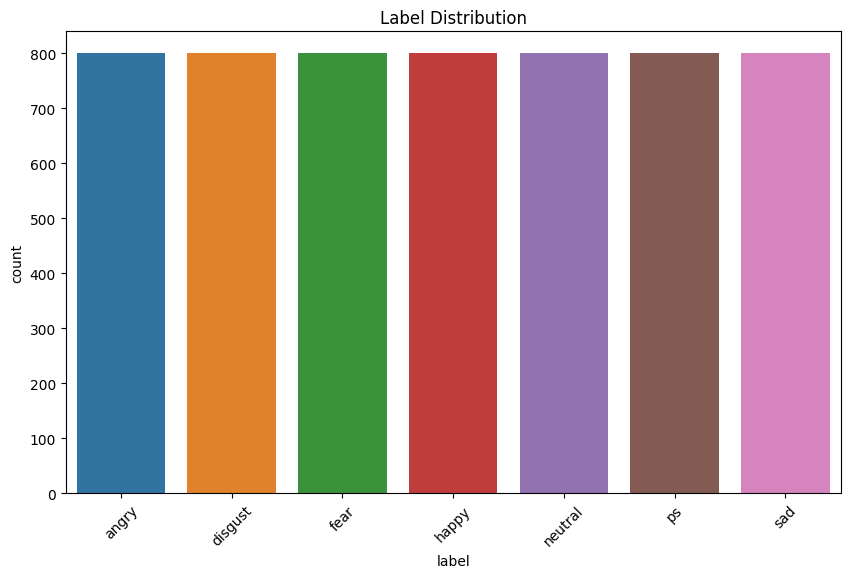

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['label'], order=df['label'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Label Distribution")
plt.show()

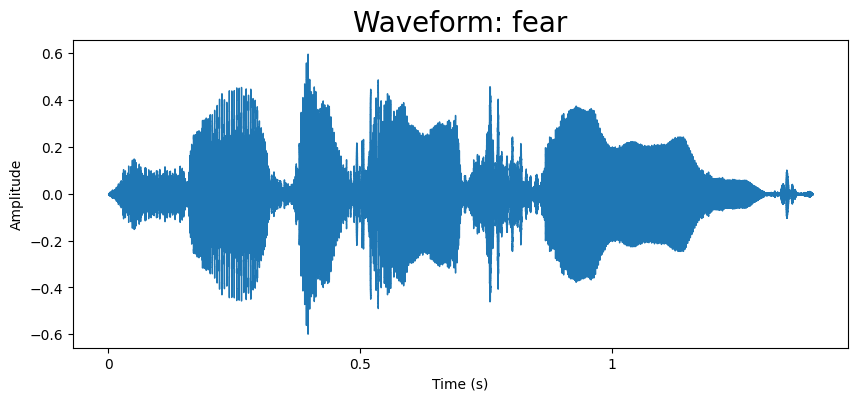

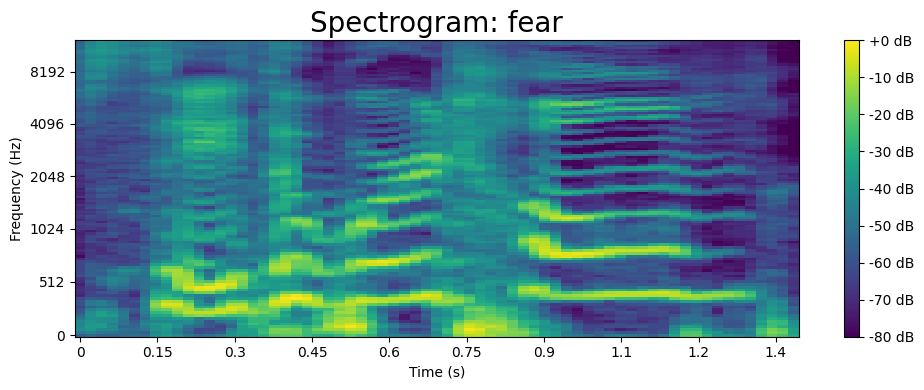

In [8]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Function to plot waveform
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(f"Waveform: {emotion}", size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()

# Function to plot spectrogram
def spectrogram(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(f"Spectrogram: {emotion}", size=20)
    # Compute Mel spectrogram
    S = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128, fmax=8000)
    S_dB = librosa.power_to_db(S, ref=np.max)  # Convert to dB scale
    librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel', cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.tight_layout()
    plt.show()

# Example Usage
emotion = 'fear'
path = df['speech'][df['label'] == emotion].iloc[0]  # Replace with actual DataFrame logic
data, sampling_rate = librosa.load(path, sr=None)

waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

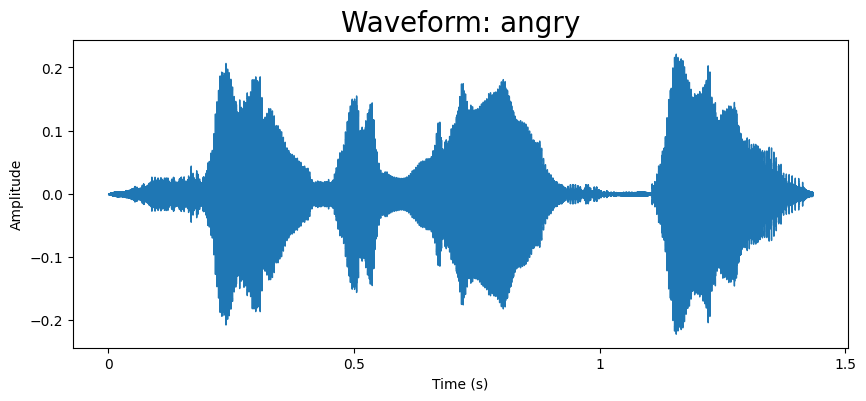

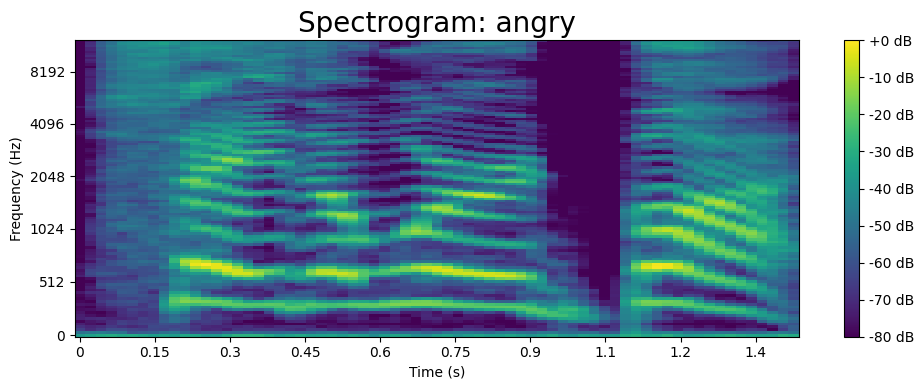

In [9]:
emotion = 'angry'
path = np.array(df['speech'][df['label'] == emotion])[2]  # Replace with actual DataFrame logic
data, sampling_rate = librosa.load(path, sr=None)

waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

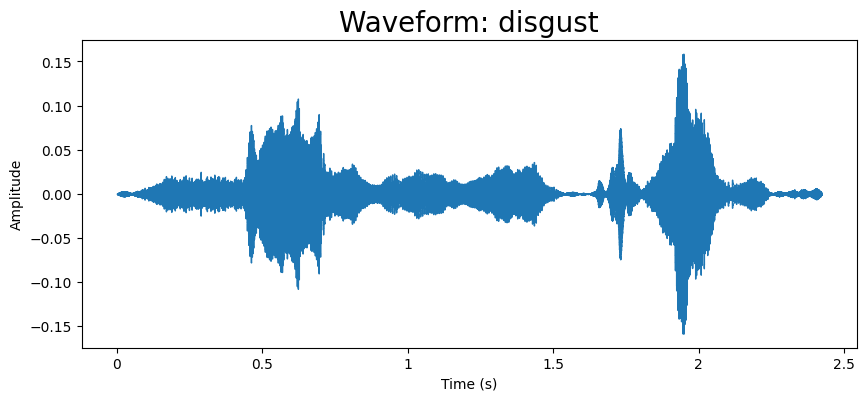

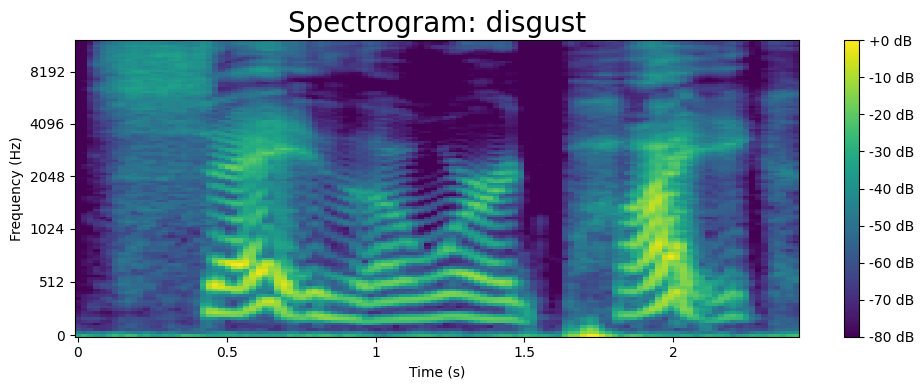

In [10]:
emotion = 'disgust'
path = np.array(df['speech'][df['label'] == emotion])[2]  # Replace with actual DataFrame logic
data, sampling_rate = librosa.load(path, sr=None)

waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

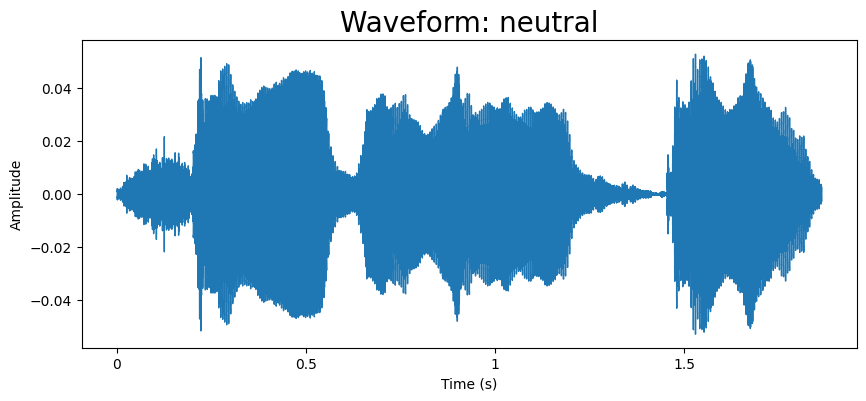

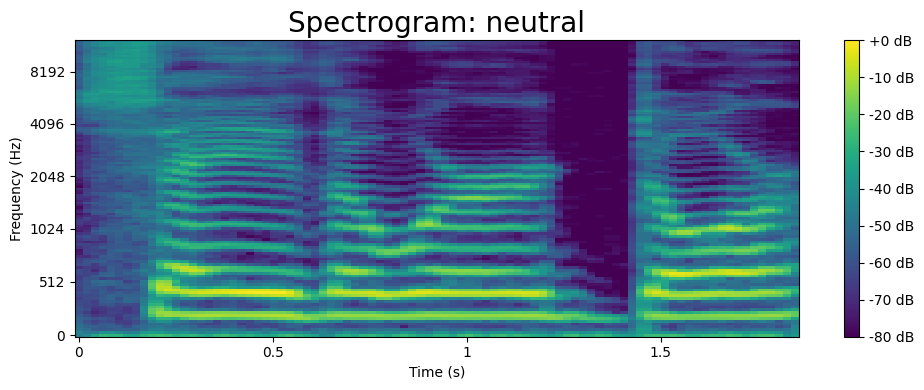

In [11]:
emotion = 'neutral'
path = np.array(df['speech'][df['label'] == emotion])[2]  # Replace with actual DataFrame logic
data, sampling_rate = librosa.load(path, sr=None)

waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

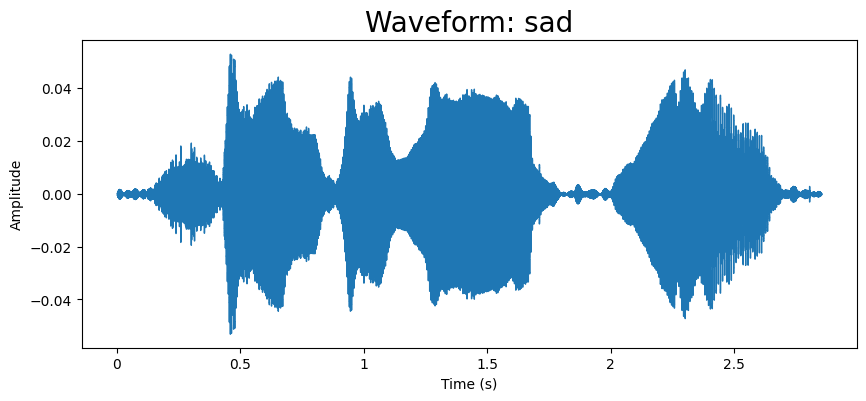

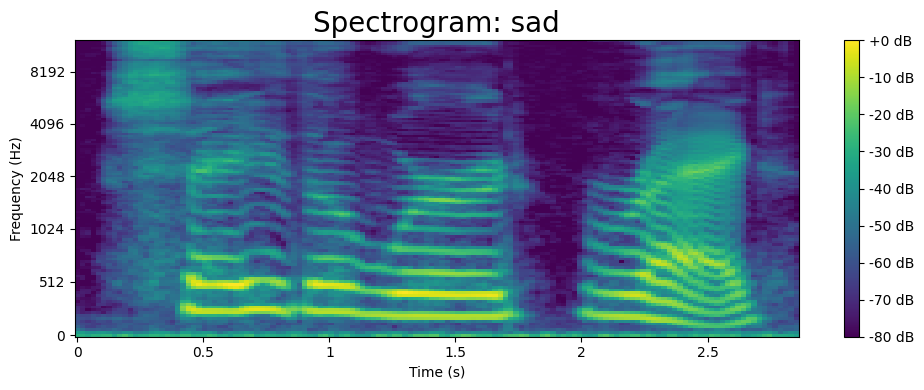

In [12]:
emotion = 'sad'
path = np.array(df['speech'][df['label'] == emotion])[2]  # Replace with actual DataFrame logic
data, sampling_rate = librosa.load(path, sr=None)

waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

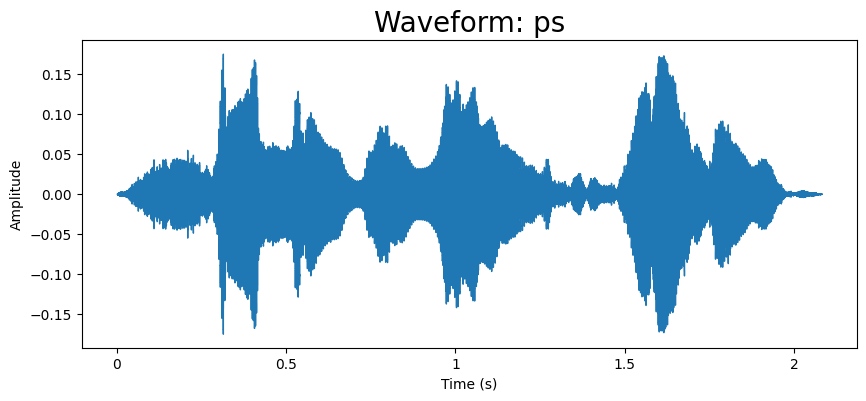

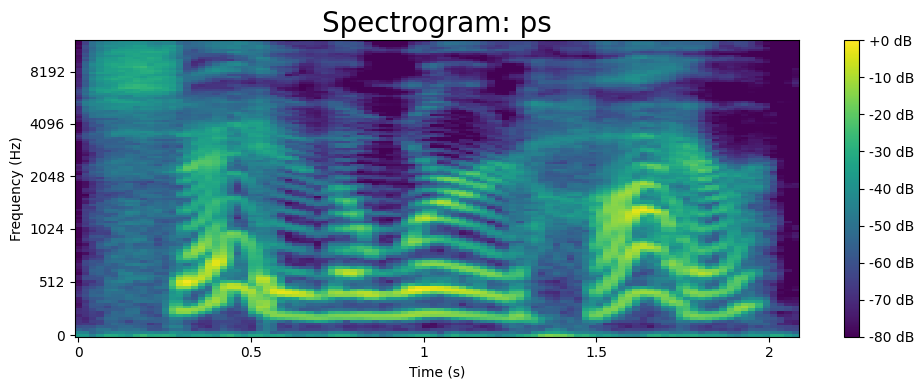

In [13]:
emotion = 'ps'
path = np.array(df['speech'][df['label'] == emotion])[2]  # Replace with actual DataFrame logic
data, sampling_rate = librosa.load(path, sr=None)

waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

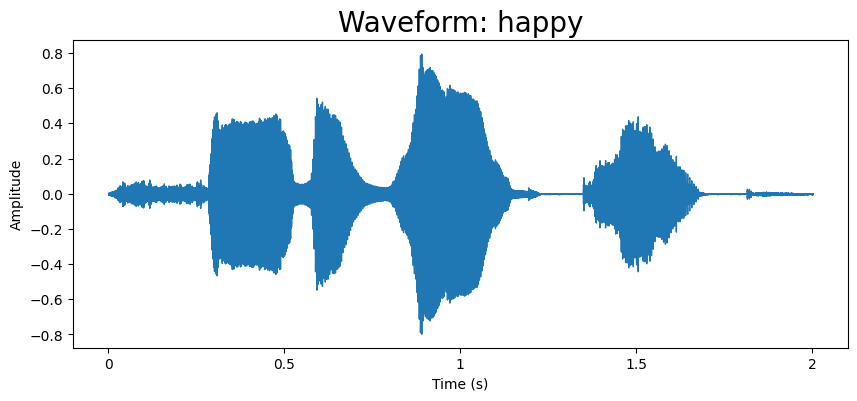

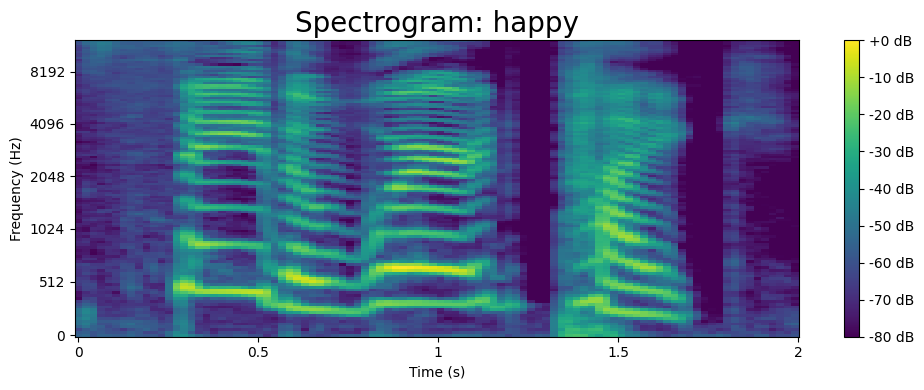

In [14]:
emotion = 'happy'
path = np.array(df['speech'][df['label'] == emotion])[2]  # Replace with actual DataFrame logic
data, sampling_rate = librosa.load(path, sr=None)

waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

In [15]:
def extract_mfcc(filename):
    y,sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)
    return mfcc

In [16]:
extract_mfcc(df['speech'][0])

array([-285.73727   ,   85.78295   ,   -2.1689117 ,   22.125532  ,
        -14.757396  ,   11.051346  ,   12.41245   ,   -3.000262  ,
          1.0844991 ,   11.078273  ,  -17.419657  ,   -8.093213  ,
          6.5879726 ,   -4.220953  ,   -9.155081  ,    3.5214806 ,
        -13.186381  ,   14.078853  ,   19.66973   ,   22.725618  ,
         32.574635  ,   16.325033  ,   -3.8427296 ,    0.89629626,
        -11.239264  ,    6.653462  ,   -2.5883694 ,   -7.714016  ,
        -10.941658  ,   -2.4007545 ,   -5.281286  ,    4.271157  ,
        -11.202216  ,   -9.024621  ,   -3.6669843 ,    4.8697433 ,
         -1.602798  ,    2.5600514 ,   11.454374  ,   11.233449  ],
      dtype=float32)

In [17]:
x_mfcc = df['speech'].apply(lambda x:extract_mfcc(x))
x_mfcc

0       [-285.73727, 85.78295, -2.1689117, 22.125532, ...
1       [-348.34332, 35.193233, -3.8413274, 14.658876,...
2       [-340.11435, 53.79644, -14.267782, 20.884027, ...
3       [-306.63422, 21.259705, -4.4110823, 6.487154, ...
4       [-344.7548, 46.329193, -24.171413, 19.392921, ...
                              ...                        
5595    [-374.3952, 60.864998, 0.02505878, 8.431058, -...
5596    [-313.96478, 39.847843, -5.649306, -3.8675754,...
5597    [-357.54883, 77.88606, -15.224756, 2.1946328, ...
5598    [-353.1474, 101.6839, -14.175897, -12.037376, ...
5599    [-389.4595, 54.042767, 1.346998, -1.4258981, -...
Name: speech, Length: 5600, dtype: object

In [18]:
x_mfcc

0       [-285.73727, 85.78295, -2.1689117, 22.125532, ...
1       [-348.34332, 35.193233, -3.8413274, 14.658876,...
2       [-340.11435, 53.79644, -14.267782, 20.884027, ...
3       [-306.63422, 21.259705, -4.4110823, 6.487154, ...
4       [-344.7548, 46.329193, -24.171413, 19.392921, ...
                              ...                        
5595    [-374.3952, 60.864998, 0.02505878, 8.431058, -...
5596    [-313.96478, 39.847843, -5.649306, -3.8675754,...
5597    [-357.54883, 77.88606, -15.224756, 2.1946328, ...
5598    [-353.1474, 101.6839, -14.175897, -12.037376, ...
5599    [-389.4595, 54.042767, 1.346998, -1.4258981, -...
Name: speech, Length: 5600, dtype: object

In [19]:
x = [x for x in x_mfcc]
x = np.array(x)
x.shape

(5600, 40)

In [20]:
##input split
x = np.expand_dims(x,-1)
x.shape

(5600, 40, 1)

In [21]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])
y = y if isinstance(y, np.ndarray) else y.toarray()

In [22]:
y.shape

(5600, 7)

**Create the LSTM model**

In [23]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123, return_sequences=False, input_shape=(40,1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 123)                 │          61,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           7,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,747 (280.26 KB)

 Trainable params: 71,747 (280.26 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
#train the model
history = model.fit(x,y, validation_split=0.2, epochs=100, batch_size=512, shuffle=True)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.3129 - loss: 1.8618 - val_accuracy: 0.2089 - val_loss: 1.9839
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5117 - loss: 1.5392 - val_accuracy: 0.1429 - val_loss: 1.9687
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6143 - loss: 1.1678 - val_accuracy: 0.1661 - val_loss: 1.6037
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6852 - loss: 0.8612 - val_accuracy: 0.4750 - val_loss: 1.2247
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7477 - loss: 0.6649 - val_accuracy: 0.7277 - val_loss: 0.8108
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8008 - loss: 0.5419 - val_accuracy: 0.7482 - val_loss: 0.7293
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8582 - loss: 0.4267 - val_accuracy: 0.8357 - val_loss: 0.4901
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8733 - loss: 0.3707 - val_accuracy: 0.8518 - val_loss:

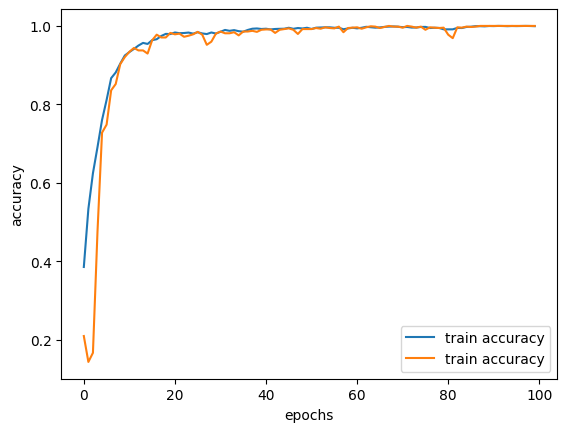

In [25]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='train accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

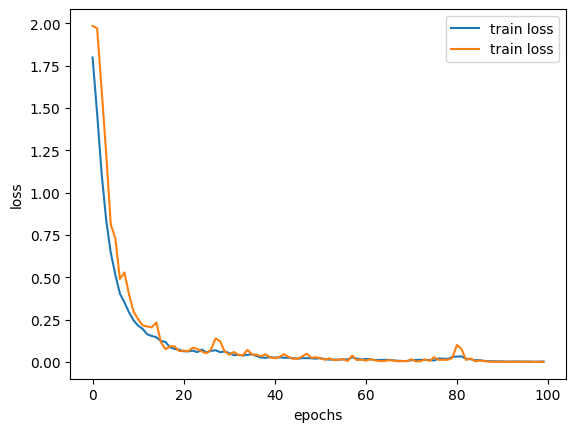

In [26]:

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='train loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()